<a href="https://colab.research.google.com/github/LIU8606/heart-sound/blob/master/heartsound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install python_speech_features
!pip install --upgrade librosa
!pip install pydub

Requirement already up-to-date: librosa in /usr/local/lib/python3.6/dist-packages (0.7.2)


In [0]:
import librosa
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from pydub import AudioSegment

def tomp3(data,rate,filename):

  audio_segment = AudioSegment(data.tobytes(), frame_rate=rate, sample_width=2, channels=1)
  audio_segment  = audio_segment + 20
  audio_segment.export(filename + ".mp3", format="mp3")


In [0]:
data_0 = data[0]

tomp3(data_0[9].astype("int16") , 1000)

In [0]:
import numpy as np

data_ekg =np.load('/content/drive/My Drive/ekg/abnormal_X(big exam).npy')
signal = np.load('/content/drive/My Drive/ekg/big_signal_s3s4label_hs2.npy')

In [69]:
data_ekg.shape

(795, 10, 10000)

In [0]:
plt.figure(figsize=(35,10))
plt.plot([i for i in range(10000)],data_ekg[674][1])

In [0]:
S3_S4_index = []
for index in range(signal.shape[0]):
    if signal[index][1] == "1.0" and  signal[index][2] == "1.0":
        S3_S4_index.append(index)

In [0]:
data_in = signal[S3_S4_index]

In [0]:
def feature(data_in):

  idx = 0
  num = 1
  plt.figure(figsize=(35,15*num))

  sr = 1000
  n_fft = 128
  hop_length = 20

  data = data_in[3:]
  print(data_in[0])
  tomp3(data.astype("int16") , 1000 , 'original_{}'.format(str(data_in[0][:-17])))
  #y, sr = librosa.load('test.wav')

  # Signal
  idx += 1
  plt.subplot(5*num, 1, idx)
  plt.title("{} waveplot".format(data_in[0]))
  librosa.display.waveplot(data.astype("float"), sr=sr, x_axis='time')

  # Spectrogram
  idx +=1
  plt.subplot(5*num, 1, idx)
  stft = librosa.core.stft(data.astype("float"), n_fft = n_fft,hop_length=hop_length )
  librosa.display.specshow(stft, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
  #plt.colorbar()
  plt.title("{} spectrogram".format(data_in[0]))


  # Mel Spectrogram
  idx +=1
  plt.subplot(5*num, 1, idx)
  MelSpec = librosa.feature.melspectrogram(data.astype("float"), sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels = 126)
  librosa.display.specshow(MelSpec, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
  #plt.colorbar()
  plt.title("{} mel spectrogram".format(data_in[0]))

  # Log Mel Spectrogram
  idx +=1
  plt.subplot(5*num, 1, idx)
  MelSpec_DB = librosa.power_to_db(MelSpec, ref=np.max)
  librosa.display.specshow(MelSpec_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
  #plt.colorbar()
  plt.title("{} log mel spectrogram".format(data_in[0]))

  # MFCC (Mel spectrogram)
  idx +=1
  mfccs = librosa.feature.mfcc(S=librosa.power_to_db(MelSpec), n_mfcc=40)
  plt.subplot(5*num,1, idx)
  librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
  #plt.colorbar()
  plt.title("{} mfcc(Mel Spectrogram)".format(data_in[0]))

  plt.show()

  return MelSpec


AHF178/PP-01_001304.bin


/usr/local/lib/python3.6/dist-packages/librosa/display.py:725: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


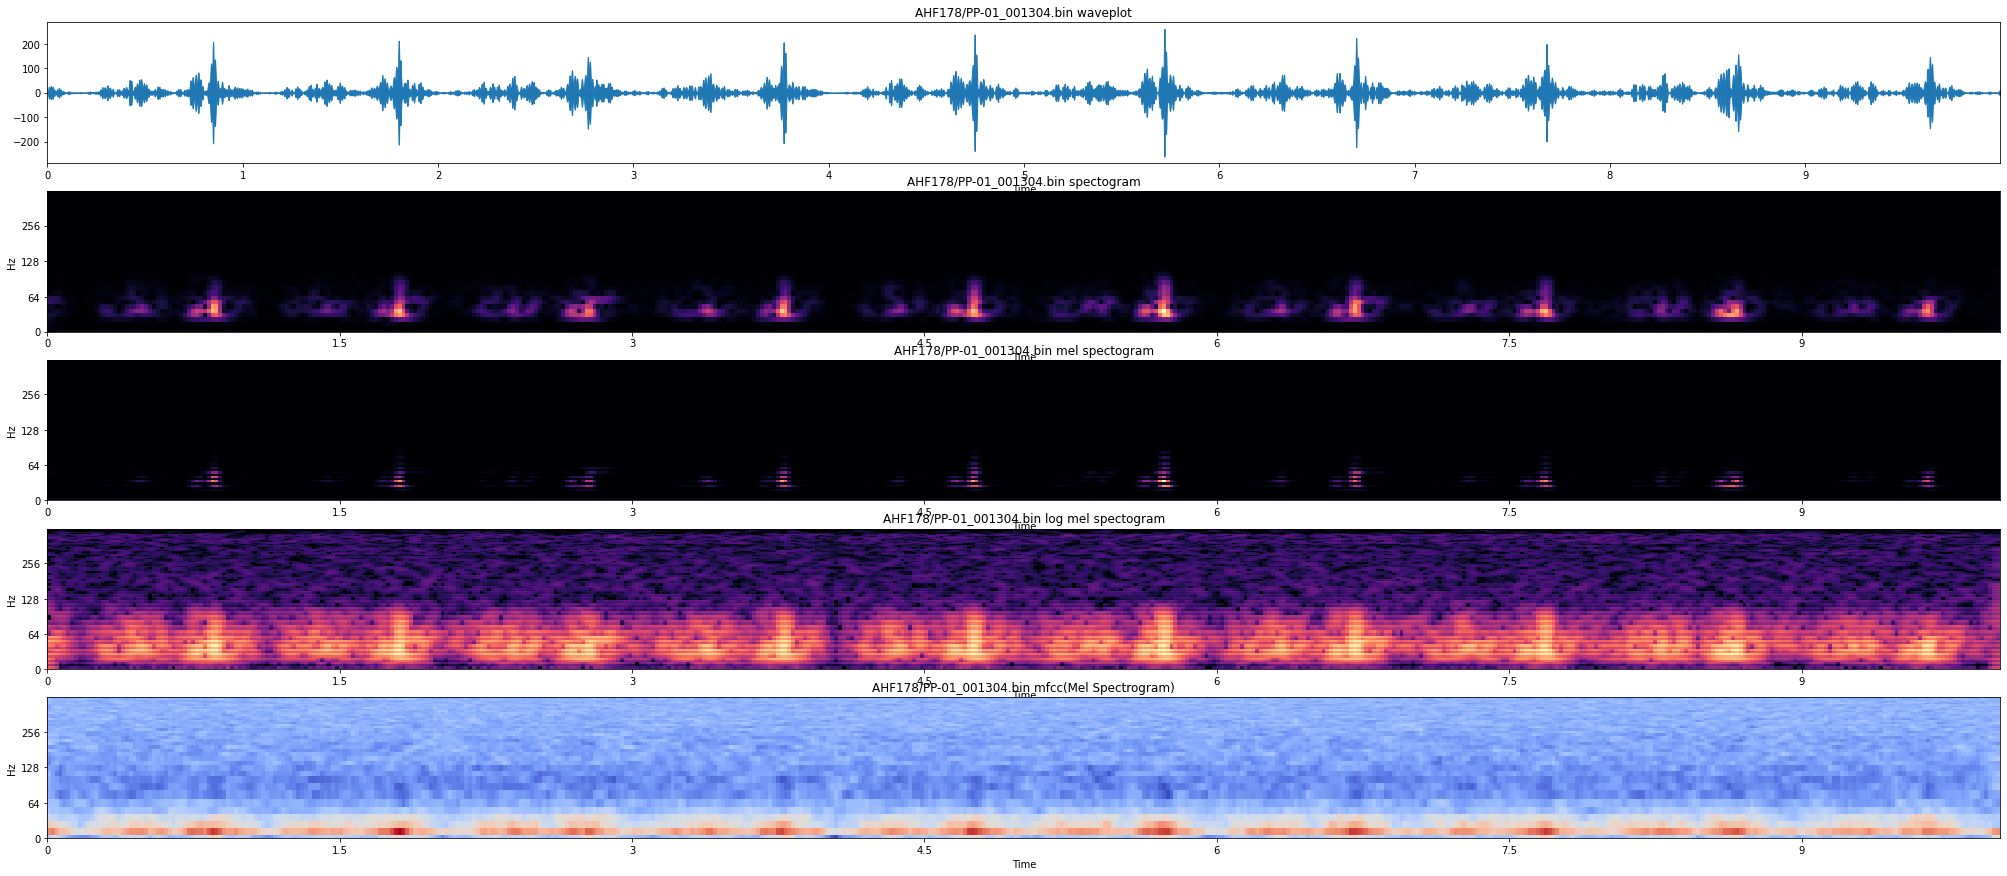

In [101]:
MelSpec = feature(data_in[0])

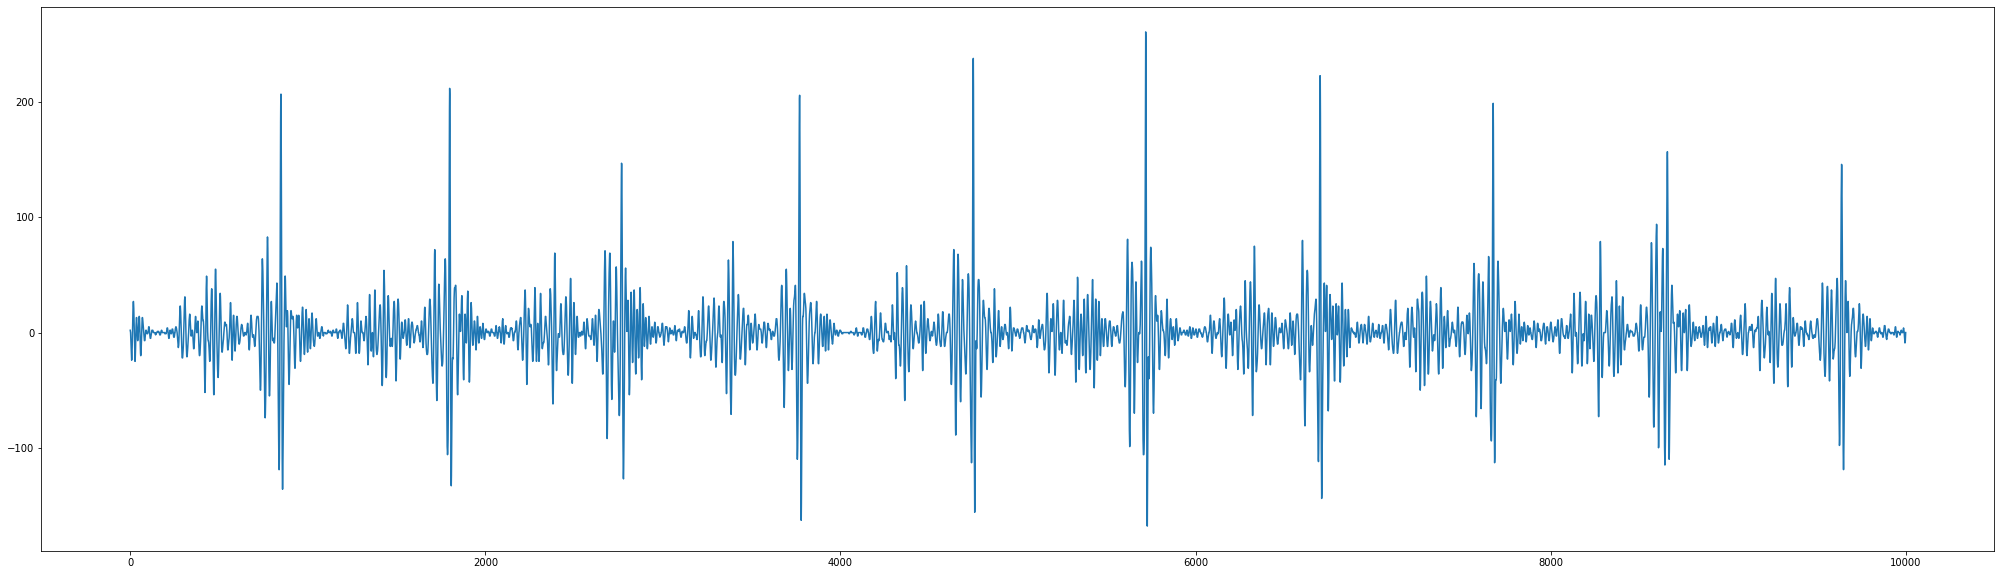

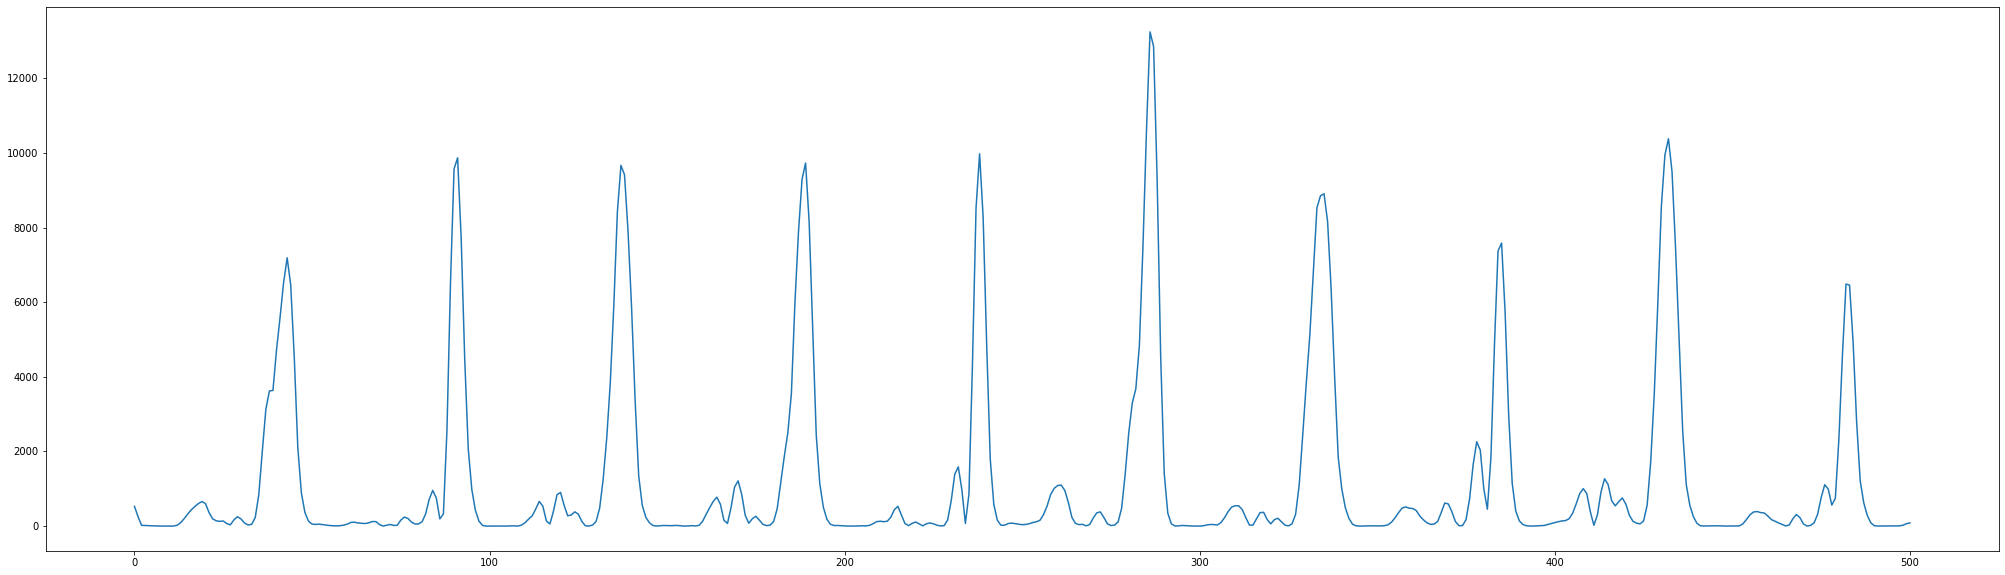

In [104]:
n = MelSpec[4].shape[0]
plt.figure(figsize=(35,10))
data = data.astype("int")
plt.plot([i for i in range(10000)],data)
plt.figure(figsize=(35,10))
plt.plot([i for i in range(n)],MelSpec[4])

[ 41  42  43  44  89  90  91  92 135 136 137 138 139 140 186 187 188 189
 190 191 237 238 239 284 285 286 287 288 331 332 333 334 335 336 337 384
 385 386 429 430 431 432 433 434 435 482 483]
[0, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 237, 238, 239, 240, 241, 242, 243, 244, 284, 285, 286, 287, 288, 289, 290, 291, 292, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 384, 385, 386, 387, 388, 389, 390, 391, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 482, 483, 484, 485, 486, 487, 488, 489]


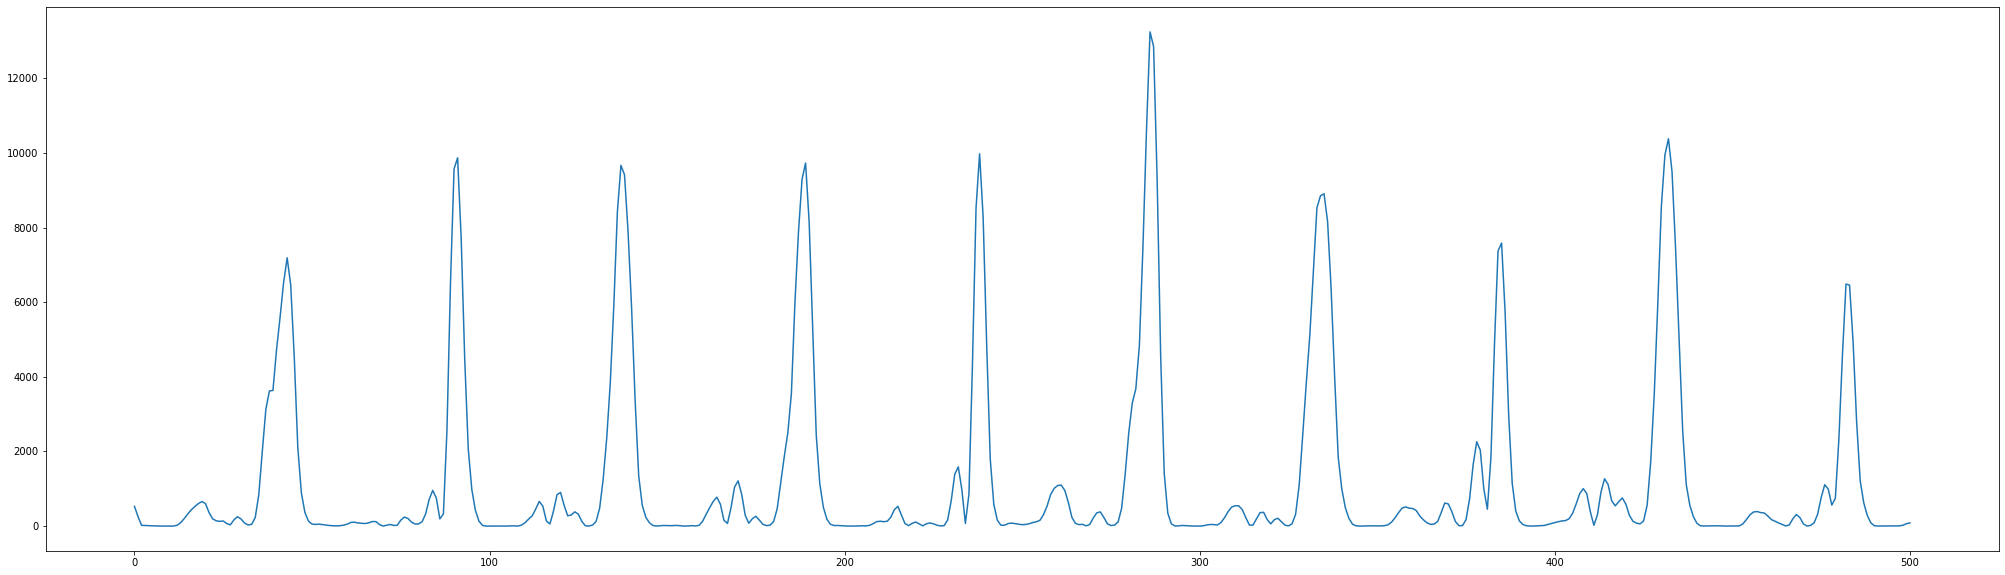

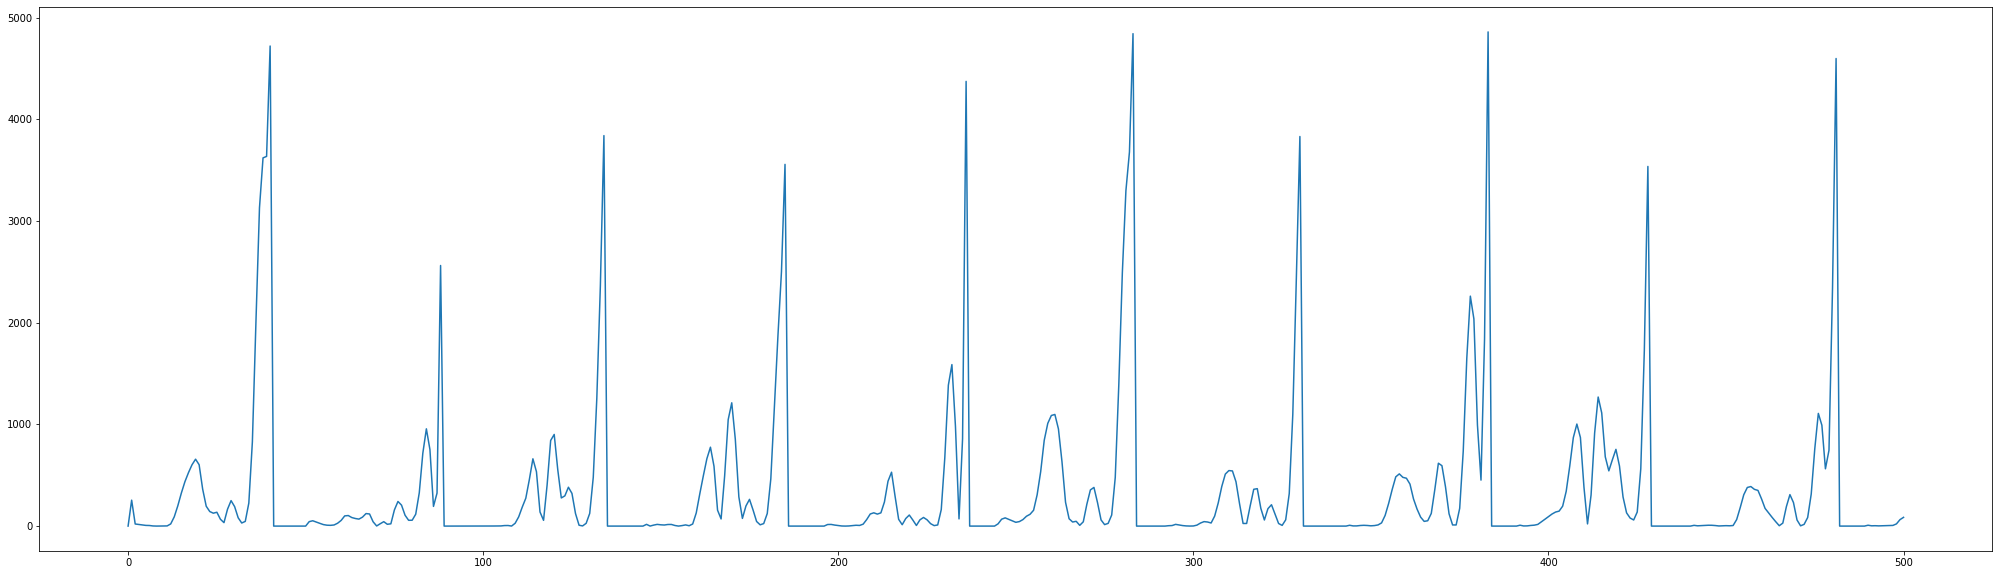

In [53]:
n = MelSpec[4].shape[0]
plt.figure(figsize=(35,10))
plt.plot([i for i in range(n)],MelSpec[4])

test= np.copy(MelSpec[4])
s1peak = np.where(test > 5000)[0]
print(s1peak)
s1_low = []
for p in s1peak:
  for i in range(25):
    if MelSpec[4][p+i] < 100:
      s1_low.append(p+i)
      break
s1_low = sorted(set(s1_low))

s1peak_plus = [0]
last_pos = []

for l in s1_low:
  for p in s1peak:
    if s1peak_plus[-1]< p < l:
      pos = [i for i in range(p,l+1,1)]
      s1peak_plus.extend(pos)
      break
print(s1peak_plus)

s1peak_minu = s1peak-2
test[s1peak_plus] = 0
plt.figure(figsize=(35,10))
plt.plot([i for i in range(test.shape[0])],test)

In [77]:
test_signal = np.copy(MelSpec)
for f in range(test_signal.shape[0]):
  test_signal[f][s1peak] = test_signal[f][s1peak] // 10
  test_signal[f][s1peak_plus] = test_signal[f][s1peak_plus] // 10
  #test_signal[f][s1peak_minu] = test_signal[f][s1peak_minu] // 10
plt.figure(figsize=(35,10))
#plt.plot([i for i in range(test_signal[4].shape[0])],test_signal[4])


<Figure size 2520x720 with 0 Axes>

<Figure size 2520x720 with 0 Axes>

In [78]:
signal_reconstruct = librosa.feature.inverse.mel_to_audio(M = test_signal, sr =sr, n_fft=n_fft, hop_length = hop_length, power=2.0)
signal_reconstruct.shape

(10000,)

([<matplotlib.axis.XTick at 0x7ff864ab1860>,
 <a list of 2 Text major ticklabel objects>)

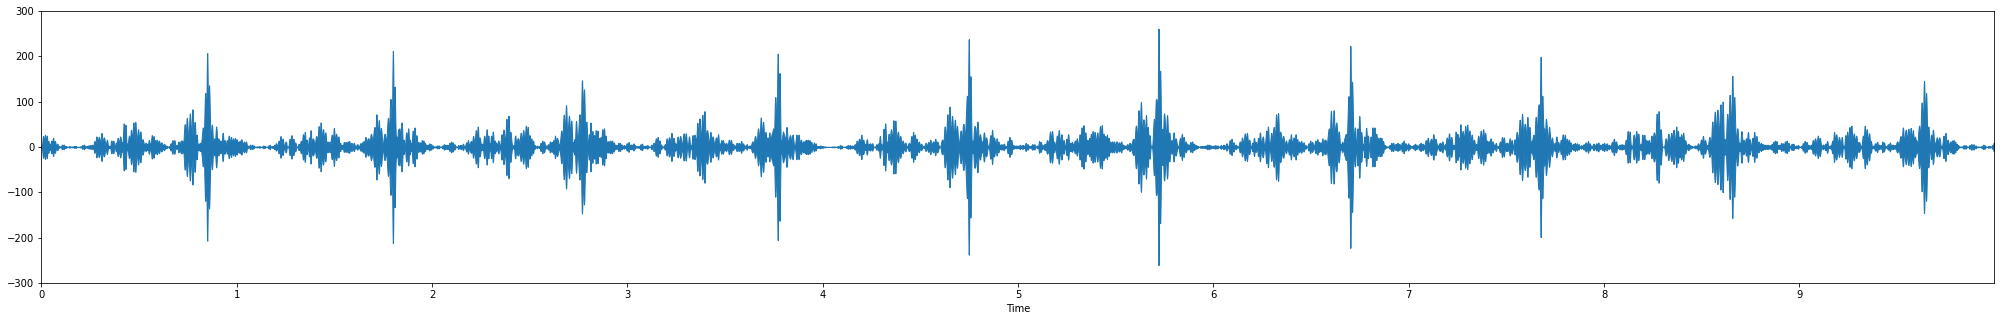

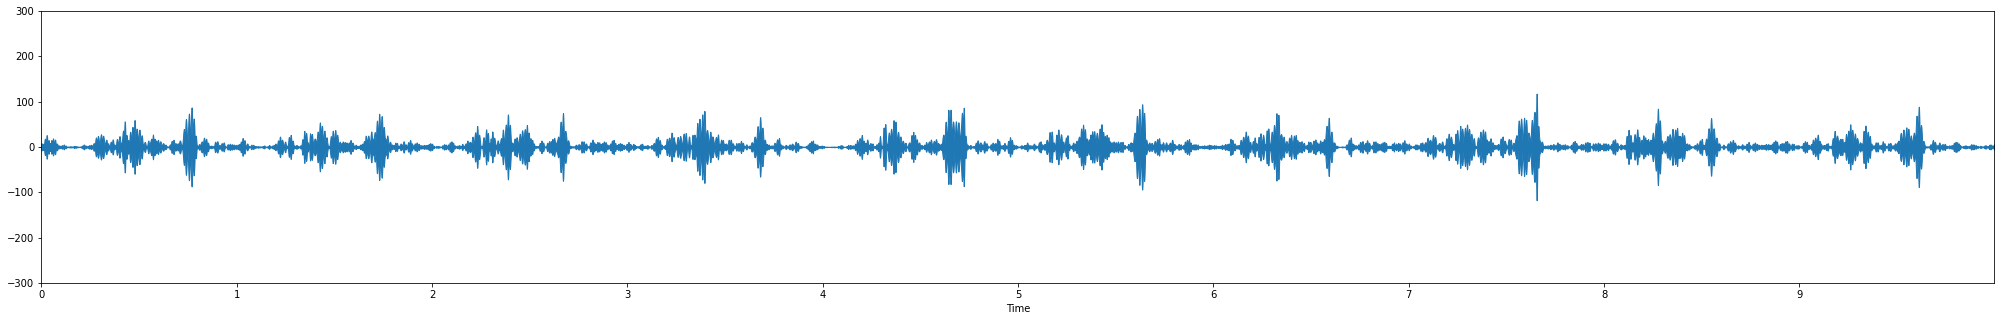

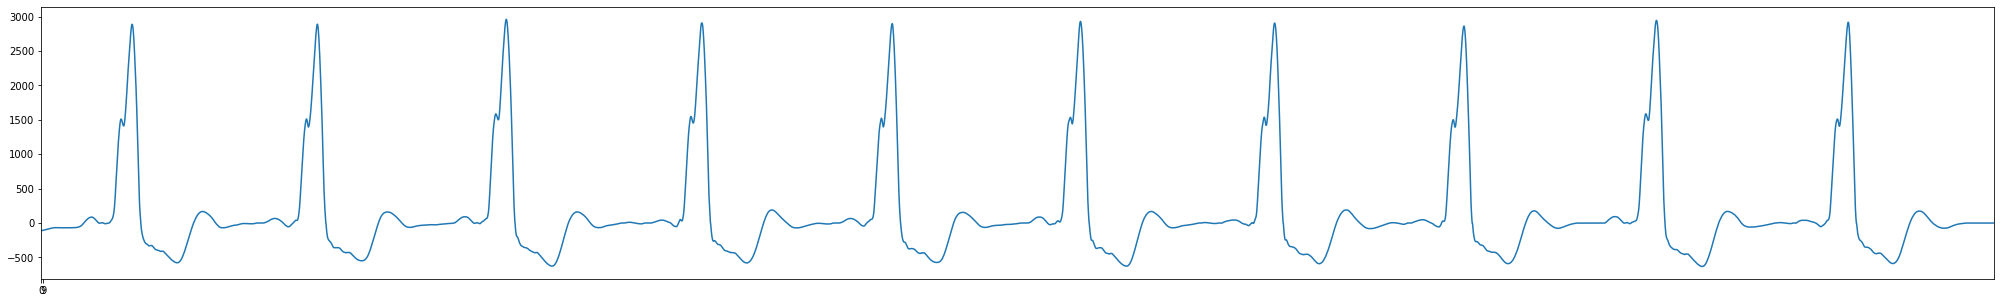

In [81]:
plt.figure(figsize=(35,5))
librosa.display.waveplot(data.astype("float32"), sr=sr, x_axis='time')
plt.ylim([-300,300])

plt.figure(figsize=(35,5))
librosa.display.waveplot(signal_reconstruct.astype("float32"), sr=sr, x_axis='time')
plt.ylim([-300,300])
tomp3(signal_reconstruct.astype("int16") , 1000, 'reconstruct')

# plt.figure(figsize=(35,5))
# plt.plot([i for i in range(10000)],data_ekg[674][7])
# plt.xlim([0,10000])
# plt.xticks([0,9])